# Exploratory Data analysis

## Data Loading

Installing data analysis packages/libraries and loading csv datafile using url

In [1]:
import pandas as pd  # For data loading, manipulation, and analysis using DataFrames
import seaborn as sns  # For advanced statistical data visualization (e.g., heatmaps, bar plots)
import numpy as np  # For numerical operations, arrays, and mathematical functions
import time  # To measure model training and prediction runtimes
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # For feature scaling
from sklearn.ensemble import RandomForestRegressor  # Ensemble model for regression using decision trees
from sklearn.linear_model import LinearRegression  # Simple linear regression model for baseline comparison
from xgboost import XGBRegressor  # Gradient boosting model for high-performance regression tasks
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error  
# For evaluating model performance using metrics like R², MAPE, and RMSE
import matplotlib.pyplot as plt  # For plotting graphs
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables
import warnings  # To suppress warnings during model training and data processing
from datetime import datetime # to get the current year
warnings.filterwarnings("ignore")


url = "https://data.winnipeg.ca/api/views/d4mq-wa44/rows.csv?accessType=DOWNLOAD"
ds = pd.read_csv(url) # reading files directy from the website
ds

,Roll Number,Street Number,Unit Number,Street Suffix,Street Direction,Street Name,Street Type,Full Address,Neighbourhood Area,Market Region,...,Proposed Assessment Value 4,Proposed Property Class 5,Proposed Status 5,Proposed Assessment Value 5,Multiple Residences,Geometry,Dwelling Units,Centroid Lat,Centroid Lon,GISID
0,1000001000,1636.0,NaN,NaN,NaN,MCCREARY,ROAD,1636 MCCREARY ROAD,WILKES SOUTH,"6, CHARLESWOOD",...,NaN,NaN,NaN,NaN,No,MULTIPOLYGON (((-97.23311670618891 49.83063124...,1.0,49.830137,-97.234696,148170
1,1000005500,1584.0,NaN,NaN,NaN,MCCREARY,ROAD,1584 MCCREARY ROAD,WILKES SOUTH,"6, CHARLESWOOD",...,NaN,NaN,NaN,NaN,No,MULTIPOLYGON (((-97.2361802081971 49.831882231...,1.0,49.831649,-97.234565,148168
2,1000008000,1574.0,NaN,NaN,NaN,MCCREARY,ROAD,1574 MCCREARY ROAD,WILKES SOUTH,"6, CHARLESWOOD",...,NaN,NaN,NaN,NaN,No,MULTIPOLYGON (((-97.23616667174454 49.83203713...,1.0,49.832113,-97.234524,185348
3,1000008200,1550.0,NaN,NaN,NaN,MCCREARY,ROAD,1550 MCCREARY ROAD,WILKES SOUTH,"6, CHARLESWOOD",...,NaN,NaN,NaN,NaN,No,MULTIPOLYGON (((-97.23612611966252 49.83250120...,1.0,49.832423,-97.234497,185347
4,1000008400,1538.0,NaN,NaN,NaN,MCCREARY,ROAD,1538 MCCREARY ROAD,WILKES SOUTH,"6, CHARLESWOOD",...,NaN,NaN,NaN,NaN,No,MULTIPOLYGON (((-97.23608555720466 49.83296537...,1.0,49.832887,-97.234457,185346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244589,14900060200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INKSTER INDUSTRIAL,"3, WEST KILDONAN / OLD KILDONAN",...,NaN,NaN,NaN,NaN,NaN,MULTIPOLYGON (((-97.17275619648407 49.93486227...,0.0,49.934936,-97.171709,513013
244590,14900060400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INKSTER INDUSTRIAL,"3, WEST KILDONAN / OLD KILDONAN",...,NaN,NaN,NaN,NaN,NaN,MULTIPOLYGON (((-97.17157232901594 49.93652079...,0.0,49.936043,-97.171610,513022
244591,14900060600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INKSTER INDUSTRIAL,"3, WEST KILDONAN / OLD KILDONAN",...,NaN,NaN,NaN,NaN,NaN,MULTIPOLYGON (((-97.19004033343711 49.94462530...,0.0,49.944469,-97.191702,3488
244592,14900060800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INKSTER INDUSTRIAL,"3, WEST KILDONAN / OLD KILDONAN",...,NaN,NaN,NaN,NaN,NaN,MULTIPOLYGON (((-97.19320289223693 49.94462815...,0.0,49.944374,-97.194047,3487


In [2]:
# displaying summary of the data
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244594 entries, 0 to 244593
Data columns (total 71 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Roll Number                      244594 non-null  int64  
 1   Street Number                    239686 non-null  float64
 2   Unit Number                      27101 non-null   object 
 3   Street Suffix                    627 non-null     object 
 4   Street Direction                 12077 non-null   object 
 5   Street Name                      241374 non-null  object 
 6   Street Type                      240708 non-null  object 
 7   Full Address                     241379 non-null  object 
 8   Neighbourhood Area               244594 non-null  object 
 9   Market Region                    244594 non-null  object 
 10  Total Living Area                219448 non-null  float64
 11  Building Type                    193096 non-null  object 
 12  Ba

# Cleaning

Dropping columns with 0 non-null values

In [3]:
# Identify columns with 0 non-null values
empty_columns = ds.columns[ds.isnull().all()].tolist()

# Drop all empty columns except the one to keep
columns_to_drop = [col for col in empty_columns ] #if col != column_to_keep
ds = ds.drop(columns=columns_to_drop)

## Descriptive statistics for numerical columns
### Comments

Identified few numerical columns that were of data type 'object'. 
They have some speical characters like Dollar sign, comma etc that needs to be stripped.

After scrubbing, the descriptive statistics of numerical columns is as following,

Interpretations:
 - there are missing values as the count are not same for all the columns, that might need imputing
 - some of them are empty columns that needs to be dropped
 - Due to large gaps in min and max values for columns like Total Living Area, Rooms etc. data might require normalisation for modelling purposes
 - there are some irrelevant columns that are identifiers but not relevant for modelling like Roll number, Street number etc.

In [4]:
# Numeric columns with special characters that need cleaning
columns_to_clean = ['Street Number','Total Living Area','Total Assessed Value','Assessed Land Area','Water Frontage Measurement','Sewer Frontage Measurement',
                    'GISID','Roll Number','Dwelling Units','Current Assessment Year']

for col in columns_to_clean:
    ds[col] = pd.to_numeric(ds[col].replace('[\$,]', '', regex=True), errors='coerce')
ds.describe()

,Roll Number,Street Number,Total Living Area,Year Built,Rooms,Number Floors (Condo),Assessed Land Area,Water Frontage Measurement,Sewer Frontage Measurement,Total Assessed Value,Current Assessment Year,Assessed Value 1,Assessed Value 2,Assessed Value 3,Assessed Value 4,Assessed Value 5,Dwelling Units,Centroid Lat,Centroid Lon,GISID
count,2.445940e+05,239686.000000,219448.000000,219448.000000,219440.000000,26351.000000,2.162820e+05,235522.000000,235238.000000,2.436840e+05,244594.0,2.436840e+05,1.997000e+03,9.900000e+01,1.200000e+01,2.000000,243684.000000,244594.000000,244594.000000,244594.000000
mean,7.798594e+09,423.409256,1304.456386,1968.808428,5.932592,1.255133,1.845929e+04,51.477904,50.826807,5.346456e+05,2026.0,5.156158e+05,1.981011e+06,4.812237e+06,2.057514e+07,240500.000000,1.356724,49.879441,-97.144908,230008.280914
std,4.027350e+09,608.477570,520.146639,32.215878,1.475695,0.522428,3.364433e+05,132.934018,116.598144,2.781814e+06,0.0,2.430584e+06,1.146756e+07,2.111307e+07,4.365675e+07,340118.361751,7.238804,0.049254,0.074713,217897.822505
min,1.000001e+09,0.000000,260.000000,1870.000000,1.000000,1.000000,1.000000e+00,0.000000,0.000000,1.000000e+00,2026.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,49.721402,-97.342436,1196.000000
25%,4.007064e+09,63.000000,960.000000,1950.000000,5.000000,1.000000,3.995000e+03,31.000000,31.000000,2.550000e+05,2026.0,2.540000e+05,1.550000e+05,1.800000e+05,3.762500e+05,120250.000000,1.000000,49.845971,-97.188344,68368.250000
50%,7.552665e+09,208.000000,1170.000000,1972.000000,6.000000,1.000000,5.273000e+03,44.000000,44.000000,3.490000e+05,2026.0,3.480000e+05,3.230000e+05,6.330000e+05,7.310000e+05,240500.000000,1.000000,49.882525,-97.146821,132791.500000
75%,1.202307e+10,571.000000,1556.000000,1990.000000,7.000000,1.000000,6.577000e+03,54.000000,54.000000,4.660000e+05,2026.0,4.650000e+05,9.550000e+05,2.270500e+06,6.361969e+06,360750.000000,1.000000,49.917752,-97.094342,478880.000000
max,1.490006e+10,6775.000000,11197.000000,2025.000000,29.000000,4.000000,8.609344e+07,29661.500000,23295.000000,6.513160e+08,2026.0,6.513160e+08,3.962340e+08,2.050710e+08,1.177100e+08,481000.000000,925.000000,49.992849,-96.956861,656480.000000


## Comments:

While going through the dataset, two rows were identified with arbitary values, '0107376627423 49.80160863413996' in all the columns, so they were dropped.

In [5]:
# Changing the data type of 'Roll Number' to object in order to remove the long random roll number
ds['Roll Number'] = ds['Roll Number'].astype(object)

# List of record IDs to drop
roll_nos_to_drop = ['0107376627423 49.80160863413996', '9257376']

# Drop rows where record_id is in the list
ds = ds[~ds['Roll Number'].isin(roll_nos_to_drop)]

## Descriptive statistics of categorical columns

Interpretations:
- There are some high cardinal columsn like Street name, unit number, Full address, Geometry that might increase complexity of model and can be dropped
- There are low cardinal columns that can be used to building type, Neighbourhood Area etc

In [6]:
# Generate descriptive statistics for categorical columns
categorical_stats = ds.describe(include='object')
categorical_stats

,Roll Number,Unit Number,Street Suffix,Street Direction,Street Name,Street Type,Full Address,Neighbourhood Area,Market Region,Building Type,...,Property Class 2,Status 2,Property Class 3,Status 3,Property Class 4,Status 4,Property Class 5,Status 5,Multiple Residences,Geometry
count,244594,27101,627,12077,241374,240708,241379,244594,244594,193096,...,1997,1997,99,99,12,12,2,2,221460,244594
unique,244594,1992,12,4,4231,38,239689,237,10,11,...,9,7,8,5,3,4,2,2,2,216593
top,1000001000,1,A,W,PEMBINA,AVENUE,MCCONNELL ROAD,RIVER PARK SOUTH,"8, FORT GARRY / LINDENWOODS",ONE STOREY,...,OTHER,TAXABLE,INSTITUTIONAL,EXEMPT,FARM,FARM VALUE NOT ASSESSED,FARM,FARM VALUE NOT ASSESSED,No,MULTIPOLYGON (((-97.14984955744468 49.89797562...
freq,1,683,315,5965,1451,71123,75,4795,33363,92158,...,787,1211,57,45,7,7,1,1,220693,408


# Handling missing data

Deleting rows can lead to loss of information in large dataset, hence for this project imputation is used to fill missing values. 

Numerical variables like Total Living Area, Rooms, Water Frontage Measurement, Sewer Frontage Measurement, Total Assessed Value were replaced by Median

Categorical Variable like Street Type, Building type, Basement, Basement Finish, Year Built were replaced by mode or by introducing new category "Missing".



In [7]:
# calculating number of null values in each column
ds.isnull().sum()

Roll Number                        0
Street Number                   4908
Unit Number                   217493
Street Suffix                 243967
Street Direction              232517
Street Name                     3220
Street Type                     3886
Full Address                    3215
Neighbourhood Area                 0
Market Region                      0
Total Living Area              25146
Building Type                  51498
Basement                       24620
Basement Finish                23134
Year Built                     25146
Rooms                          25154
Air Conditioning               51497
Fire Place                     23134
Attached Garage                50038
Detached Garage                50038
Pool                           50038
Number Floors (Condo)         218243
Property Use Code                  0
Assessed Land Area             28312
Water Frontage Measurement      9072
Sewer Frontage Measurement      9356
Property Influences           127541
Z

In [8]:
# Drop the first unnamed column if it's just an index
if ds.columns[0].startswith('Unnamed'):
    ds = ds.iloc[:, 1:]

# Summary of missing values before imputation
missing_before = ds.isnull().sum()

# Separate numerical and categorical columns
numerical_cols = ds.select_dtypes(include=['number']).columns
categorical_cols = ds.select_dtypes(include=['object']).columns

# Handle missing values
# For numerical columns: median imputation
for col in numerical_cols:
    median_value = ds[col].median()
    ds[col].fillna(median_value, inplace=True)

# For categorical columns: mode imputation or 'Missing' category
for col in categorical_cols:
    mode_value = ds[col].mode()
    if not mode_value.empty:
        ds[col].fillna(mode_value[0], inplace=True)
    else:
        ds[col].fillna('Missing', inplace=True)

# Summary of missing values after imputation
missing_after = ds.isnull().sum()
missing_after

Roll Number                   0
Street Number                 0
Unit Number                   0
Street Suffix                 0
Street Direction              0
Street Name                   0
Street Type                   0
Full Address                  0
Neighbourhood Area            0
Market Region                 0
Total Living Area             0
Building Type                 0
Basement                      0
Basement Finish               0
Year Built                    0
Rooms                         0
Air Conditioning              0
Fire Place                    0
Attached Garage               0
Detached Garage               0
Pool                          0
Number Floors (Condo)         0
Property Use Code             0
Assessed Land Area            0
Water Frontage Measurement    0
Sewer Frontage Measurement    0
Property Influences           0
Zoning                        0
Total Assessed Value          0
Assessment Date               0
Detail URL                    0
Current 

# Comments:

The project requires prediction model for RESIDENTIAL PROPERTIES. So the column 'Property Use Code' is used to identify residential properties. 

In [9]:
# List all unique categories in the 'Property Use Code' column to identify residential properties only
unique_categories = ds['Property Use Code'].dropna().unique().tolist()
unique_categories

['RESSD - DETACHED SINGLE DWELLING',
 'AGRII - IMPROVED AGRICULTURAL',
 'VRES1 - VACANT RESIDENTIAL 1',
 'RESMB - RESIDENTIAL MULTIPLE BUILDINGS',
 'VAGRI - VACANT AGRICULTURAL',
 'RESSS - SIDE BY SIDE',
 'VAPRK - VACANT PARK',
 'CMOGV - GOVERNMENT OFFICE',
 'CNCMP - CONDO COMPLEX',
 'CNRES - CONDO RESIDENTIAL',
 'PIISC - SCHOOL',
 'RESAP - APARTMENTS',
 'PIICH - CHURCH',
 'CMRRE - RESTAURANT',
 'RESAM - APARTMENTS MULTIPLE USE',
 'PIINH - NURSING HOME',
 'INMMI - INDUSTRIAL MISCELLANEOUS',
 'INWWH - WAREHOUSE',
 'RESMU - RESIDENTIAL MULTIPLE USE',
 'CMRST - STORE',
 'CMOFF - OFFICE',
 'CMVSR - VEHICLE SERVICE RELATED',
 'RESMA - MULTIPLE ATTACHED UNITS',
 'CMSTP - STRIP MALL',
 'RESSU - RESIDENTIAL SECONDARY UNIT',
 'CNAPT - CONDO APARTMENT',
 'INMMU - INDUSTRIAL MULTIPLE USE',
 'RESOT - RESIDENTIAL OUTBUILDING',
 'CMRNS - NEIGHBOURHOOD SHOPPING CENTRE',
 'PIRCC - COMMUNITY CENTRE',
 'RESGC - RESIDENTIAL GROUP CARE',
 'HYDSS - HYDRO SUBSTATIONS',
 'STATR - STATUTORY RAILWAY ROADWAY',


In [10]:
# Categories to filter
categories_to_keep = ['RESSD - DETACHED SINGLE DWELLING', 'RESMB - RESIDENTIAL MULTIPLE BUILDINGS',
                     'RESSS - SIDE BY SIDE','RESSS - SIDE BY SIDE','RESMH - MOBILE HOME',
                      'RESRM - ROOMING HOUSE','RESDU - DUPLEX','RESTR - TRIPLEX','RESRH - ROW HOUSING',
                      'RESMC - MULTIFAMILY CONVERSION','RESGC - RESIDENTIAL GROUP CARE',
                      'RESOT - RESIDENTIAL OUTBUILDING','RESSU - RESIDENTIAL SECONDARY UNIT',
                      'RESMA - MULTIPLE ATTACHED UNITS','RESMU - RESIDENTIAL MULTIPLE USE',
                      'RESAM - APARTMENTS MULTIPLE USE','RESAP - APARTMENTS','CNRES - CONDO RESIDENTIAL'
                     ]

# Filter the DataFrame to include only rows with specified residential type
ds = ds[ds['Property Use Code'].isin(categories_to_keep)]

# Correlation analysis

The next step is to find relationship between target variable i.e. Total Assessed Value and other features with the help of correlation co-efficients. 
- The features with values closer to +1 or -1 indicates stronger relationship with target variable. For example, Dwelling units
- However any value closer to 0 indicates no or weak relationship for example Current Assessment Year, Centroid Lat, Roll Number, Centroid Lon and can be dropped.
- Variables like Total Living area, Year Built, Rooms needs further investigation as they are key features for the prediction model

In [11]:
# Select only numerical features for correlation analysis
numerical_dataset = ds.select_dtypes(include=['number'])
correlation=numerical_dataset.corr()
print(correlation['Total Assessed Value'].sort_values(ascending=False),'\n')

Total Assessed Value          1.000000
Assessed Value 1              0.951551
Dwelling Units                0.868046
Water Frontage Measurement    0.484861
Sewer Frontage Measurement    0.470223
Assessed Value 2              0.442435
Assessed Land Area            0.239460
Assessed Value 3              0.095405
Total Living Area             0.086190
GISID                         0.081568
Year Built                    0.078235
Rooms                         0.054204
Street Number                 0.006862
Assessed Value 4              0.000566
Centroid Lon                 -0.007653
Number Floors (Condo)        -0.013653
Centroid Lat                 -0.049371
Current Assessment Year            NaN
Assessed Value 5                   NaN
Name: Total Assessed Value, dtype: float64 



# Comments:

Identifying object, integer, float type columns and assigning them to different subsets

In [12]:
# identifying object type columns
obj = (ds.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

# identifying integer type columns
int_ = (ds.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

# identifying float type columns
fl = (ds.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 34
Integer variables: 0
Float variables: 17


### Comments:
 - As per correlation analysis, dropping column 'Current Assessment Year', 'GISD','Street number', 'Centroid Lon', 'Centroid Lat'.
 - Features with a large number of unique categories can be challenging to handle in machine learning models, as they might lead to high-dimensional data.The columns with more than 500 categories may not contribute to AVM. Hence they can be dropped. 
 - Also columns with 1 category were looked into manually in excel file. They were just singular value against a property record which would play no role in prediction modelling, so they are dropped.
 - Columns like Assessed Value, status, Property Class 1, 2,3,4,5 were dropped as we have a condensed column displaying the same values.

In [13]:
Cols_to_drop = ['Full Address','Geometry','Detail URL', 'Assessment Date',
                'Assessed Value 1','Assessed Value 2','Assessed Value 3','Assessed Value 4',
                'Assessed Value 5','Property Class 1','Property Class 2','Property Class 3',
                'Property Class 4','Property Class 5','Status 1','Status 2','Status 3','Status 4',
                'Status 5','Unit Number','Street Name','Street Suffix','Dwelling Units',
                'Multiple Residences','Property Influences','Number Floors (Condo)', 'Street Number',
                'Current Assessment Year','GISID','Centroid Lon','Centroid Lat','Roll Number']
ds = ds.drop(columns=Cols_to_drop)

### Comments: 
identifying number of unique categores each object type columns have.

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

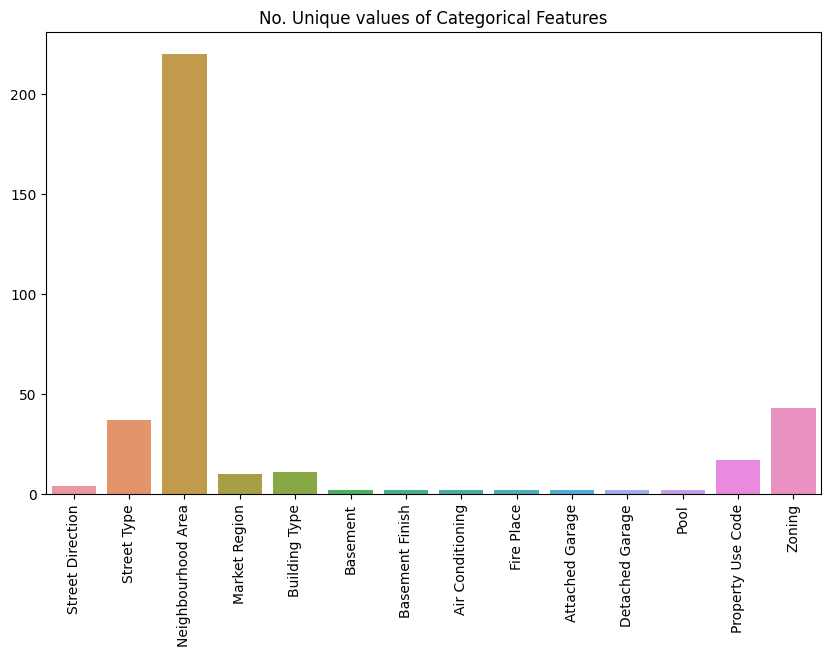

In [15]:
# identifying object type columns
obj = (ds.dtypes == 'object')
object_cols = list(obj[obj].index)


unique_values = []
for col in object_cols:
    unique_values.append(ds[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

In [16]:
category_counts = ds[object_cols].nunique()
category_counts

Street Direction        4
Street Type            37
Neighbourhood Area    220
Market Region          10
Building Type          11
Basement                2
Basement Finish         2
Air Conditioning        2
Fire Place              2
Attached Garage         2
Detached Garage         2
Pool                    2
Property Use Code      17
Zoning                 43
dtype: int64

<Axes: >

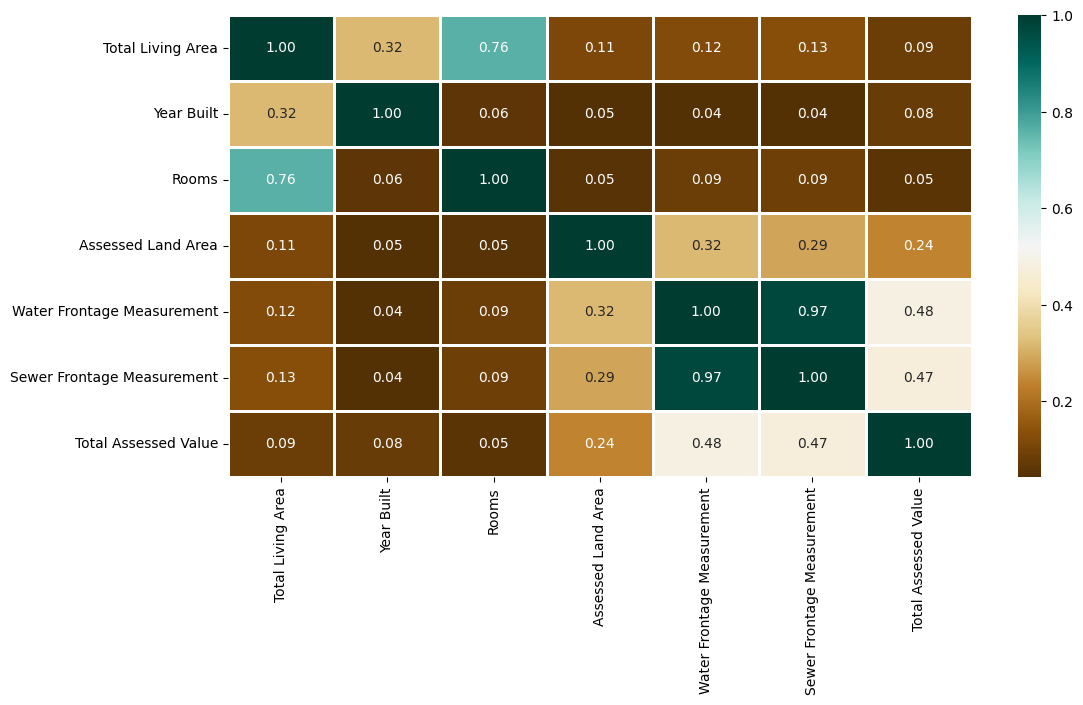

In [17]:
# Select only numerical features for correlation analysis
numerical_dataset = ds.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

### Comments:

Variables like Total Living area, Year Built, Rooms were further investigation as they are key features for the prediction model

From all three scatterplots, one can analyse the following,
- there a outliers that can distort the prediction models
- there can be non-linear relationships which is well covered in random forests and xgboost
- Histogram and boxplot can be created to understand further about the distributions and skewness

<Axes: xlabel='Total Living Area', ylabel='Total Assessed Value'>

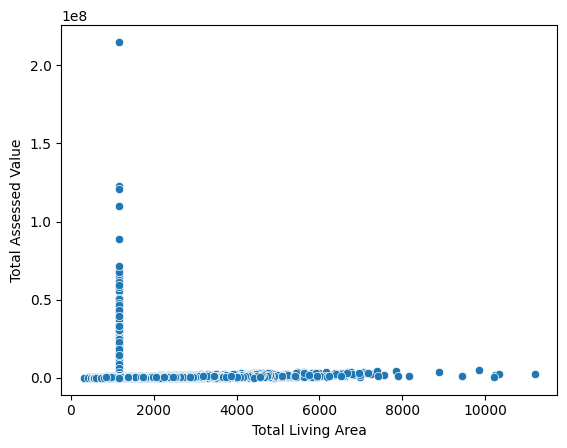

In [18]:
sns.scatterplot(x=ds['Total Living Area'], y=ds['Total Assessed Value'])

<Axes: xlabel='Rooms', ylabel='Total Assessed Value'>

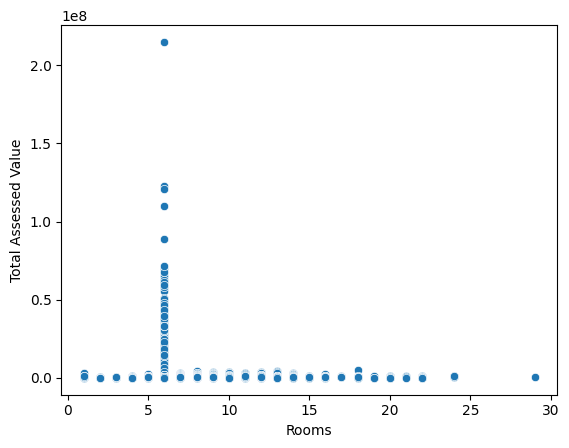

In [19]:
sns.scatterplot(x=ds['Rooms'], y=ds['Total Assessed Value'])

<Axes: xlabel='Year Built', ylabel='Total Assessed Value'>

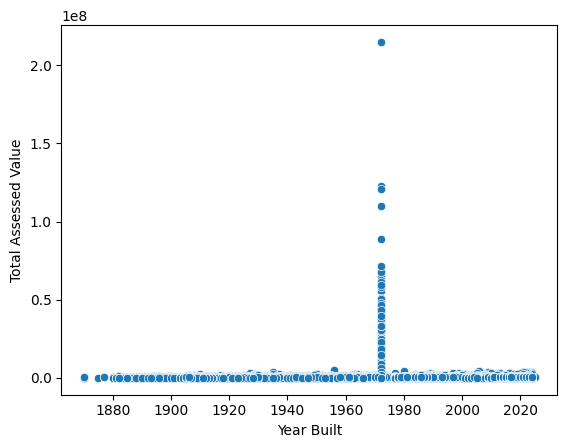

In [20]:
sns.scatterplot(x=ds['Year Built'], y=ds['Total Assessed Value'])

### Checking for Data quality issues

- Total Living Area has maximum value as 11197 which significantly higher than 75th percentile indicating outliers. There can be records of properties that are large estates or multi-unit buildings. These large values can skew model training
- The maximum date is 2025 that is the current year, some records may indicate future date, or data error. these records would need validation
- Rooms has maximum value as 29 which might indicate mansions

In [21]:
ds[['Total Living Area', 'Year Built', 'Rooms']].describe()

,Total Living Area,Year Built,Rooms
count,203558.000000,203558.000000,203558.000000
mean,1335.617853,1967.141734,6.094450
std,519.727464,31.913784,1.408149
min,312.000000,1870.000000,1.000000
25%,998.000000,1949.000000,5.000000
50%,1192.000000,1970.000000,6.000000
75%,1588.000000,1988.000000,7.000000
max,11197.000000,2025.000000,29.000000


### Comments
Histograms and Boxplots is used to further understand outliers and skewness in distribution for these features.

- **Total Living Area**
    - Histogram:  The distribution is right skewed indicating most properties having living area between 500 to 2000 sq feet
    - Box plot: The plot confirms peak of histogram and depicts outliers for Living area more than 2500 sq feet
    The outliers can be capped at 99th percentile and with log transformation to normalise the distribution

- **Year Built**
     - Histogram: this distribution is multimodal with distinct peaks early 1900, 1940 - 1960, 1980. Few builts before 1900 indicating outliers
     - Box plot: The plot confirms outliers before 1900 which might have to handled
    A derieved feature 'Age of Property' can be used instead to deal with outliers, and multimodal 
     

- **Rooms**
     - Histogram: The distribution is also right skewed indicating most properties has 5-10 rooms
     - Box plot: The plot indicates outliers after 10 indicating few luxury properties
    The outliers can be capped at 99th percentile 


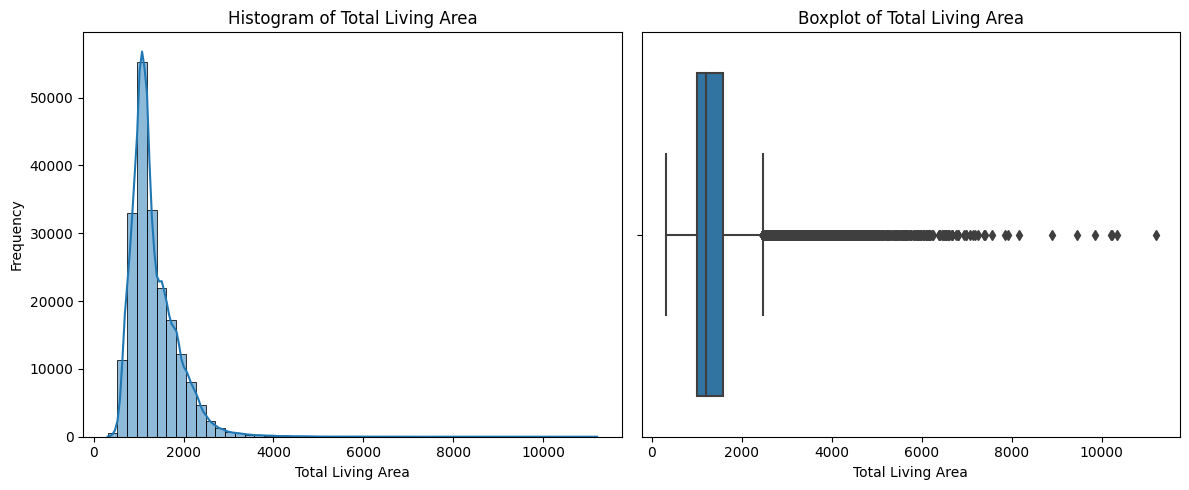

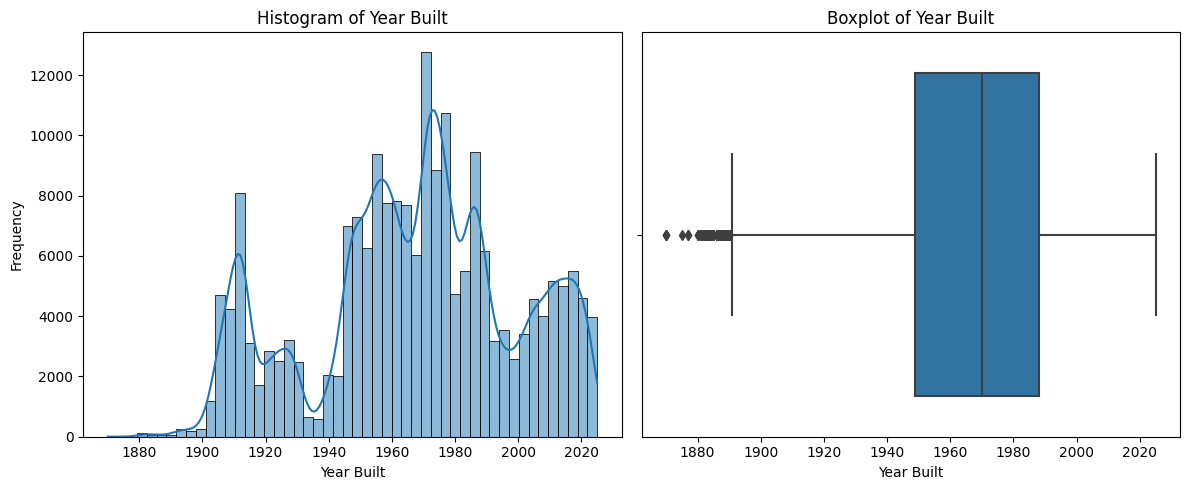

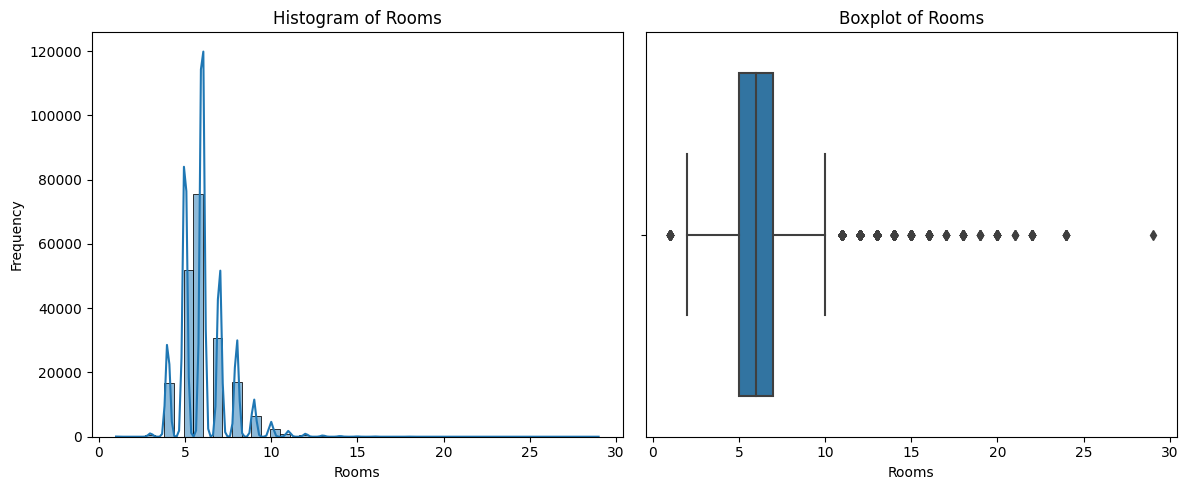

In [22]:
features = ['Total Living Area', 'Year Built', 'Rooms']

for col in features:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(ds[col].dropna(), kde=True, bins=50)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=ds[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

### Dealing with outliers

In [23]:
cap = ds['Total Living Area'].quantile(0.99)
ds['Total Living Area'] = ds['Total Living Area'].clip(upper=cap)

In [24]:
ds['Log_LivingArea'] = np.log1p(ds['Total Living Area'])


In [25]:
cap = ds['Rooms'].quantile(0.99)
ds['Rooms'] = ds['Rooms'].clip(upper=cap)

### Feature Engineering

A new feature "Age of property" is derived using Year built to deal with multimodal distribution and outliers

In [26]:
# Create 'Age of Property'
current_year = datetime.now().year
ds['Age of Property'] = current_year - ds['Year Built']

In [28]:
Cols_to_drop = ['Total Living Area','Year Built']
ds = ds.drop(columns=Cols_to_drop)

In [29]:
ds.columns

Index(['Street Direction', 'Street Type', 'Neighbourhood Area',
       'Market Region', 'Building Type', 'Basement', 'Basement Finish',
       'Rooms', 'Air Conditioning', 'Fire Place', 'Attached Garage',
       'Detached Garage', 'Pool', 'Property Use Code', 'Assessed Land Area',
       'Water Frontage Measurement', 'Sewer Frontage Measurement', 'Zoning',
       'Total Assessed Value', 'Log_LivingArea', 'Age of Property'],
      dtype='object')

### One- Hot Encoding for Categorical columns

In order to process categorical columns in machine learning algorithms, the categorical columns has to be encoded to numerical columns.

- Low-Cardinality Categorical Columns (≤ 20 unique values)
These were one-hot encoded (converted into binary columns):

    - Market Region
    - Building Type
    - Basement
    - Basement Finish
    - Air Conditioning
    - Fire Place
    - Attached Garage
    - Detached Garage
    - Pool
    - Property Use Code

- High-Cardinality Categorical Columns (> 20 unique values)
These were frequency encoded (replaced with the count of each category's occurrence):

    - Street Type
    - Neighbourhood Area
    - Zoning

In [30]:
# Drop unnamed index column if present
ds = ds.loc[:, ~ds.columns.str.contains('^Unnamed')]

# Identify categorical columns (object or bool types)
categorical_cols = ds.select_dtypes(include=['object', 'bool']).columns.tolist()

# Count unique categories in each categorical column
category_counts = ds[categorical_cols].nunique()

# Separate columns into low and high cardinality
low_cardinality = category_counts[category_counts <= 20].index.tolist()
high_cardinality = category_counts[category_counts > 20].index.tolist()

# One-hot encode low-cardinality categorical columns
df_encoded = pd.get_dummies(ds, columns=low_cardinality, drop_first=True)

# Frequency encode high-cardinality categorical columns
for col in high_cardinality:
    freq_encoding = ds[col].value_counts()
    df_encoded[col + '_freq'] = ds[col].map(freq_encoding)

# Drop original high-cardinality columns
df_encoded.drop(columns=high_cardinality, inplace=True)

# Feature Selection, Prediction model and performance

**RF-Min-Max-ZScore and XGB-Min-Max-Zscore**
*Actual vs Predicted* : 
- Most predictions are clustered near the origin, indicating that the model performs well for lower-value properties.
- As actual values increase, the predicted values tend to underperform, with many predictions falling below the ideal diagonal line.
- This suggests the model may be underestimating high-value properties, possibly due to insufficient high valued property records in training data


*Residual plot*: 
 - Most residuals are centered around zero means predictions are mostly close to actual values. However, there’s a noticeable spread, especially for higher predicted values:
        - Some residuals are positive, meaning the model underpredicted.
        - Some are negative, meaning the model overpredicted.


**LR-Min-Max-Zscore**
*Actual vs Predicted* : 
- The predictions are significantly deviating from with actual values indicating that Linear Regression is not capturing the complexity of the relationships in your data, especially with skewed or non-linear patterns.

*Residual plot*: 
- Residuals are widely scattered, especially for higher predicted values.
- This pattern confirms that the model is not a good fit, especially for expensive properties.


**Model Performance Metrics**

R² (Coefficient of Determination): Higher is better (closer to 1).
MAPE (Mean Absolute Percentage Error): Lower is better.
nRMSE (Normalized Root Mean Squared Error): Lower is better.

XGBoost (XGB) performs best overall, regardless of scaling method.
Random Forest (RF) is solid but slightly less accurate than XGB.
Linear Regression (LR) performs poorly, with low R² and high error rates—likely underfitting the data.


**Model Runtime Comparison**
The table compares how long each model took to train and predict.


Linear Regression is fastest, but its poor performance makes it unsuitable.
XGBoost offers the best trade-off between speed and accuracy.
Random Forest is the slowest, likely due to tree depth and ensemble size.


**Model MSE Comparison**
The table evaluates the accuracy of predictive models

XGBoost has the lowest MSE, confirming its superior predictive accuracy.
Random Forest is close, but slightly less precise.
Linear Regression has the highest error, reinforcing its poor fit.


**Overall**
*Best Model*: XGBoost (MinMax or ZScore)
*Best Accuracy*: XGB (highest R², lowest MAPE & nRMSE)
*Best Efficiency*: XGB (fast runtime, low MSE)

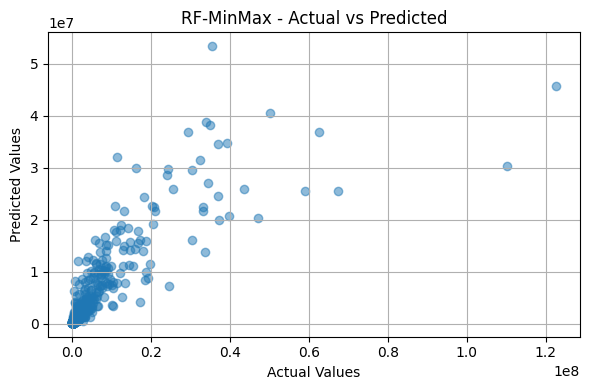

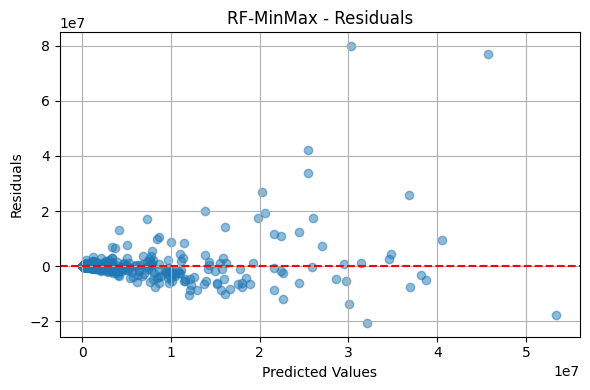

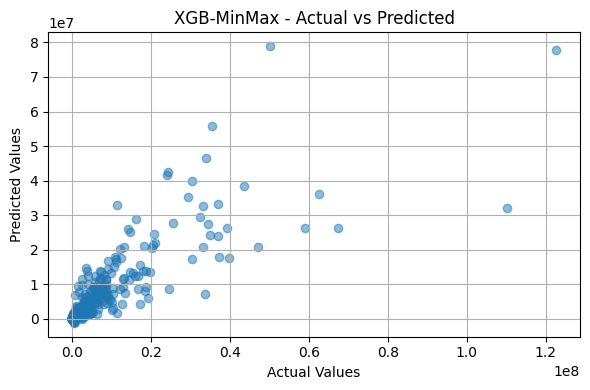

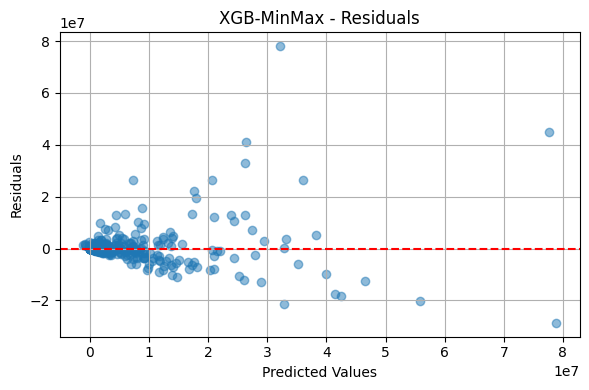

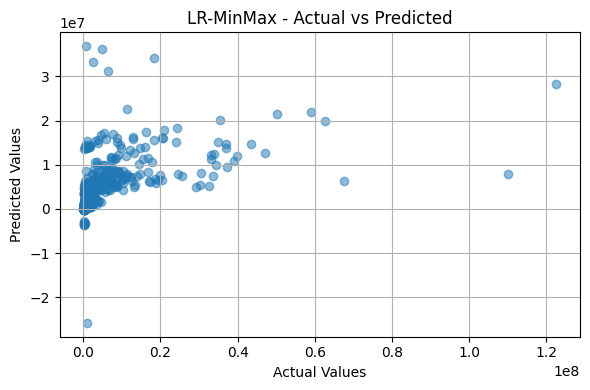

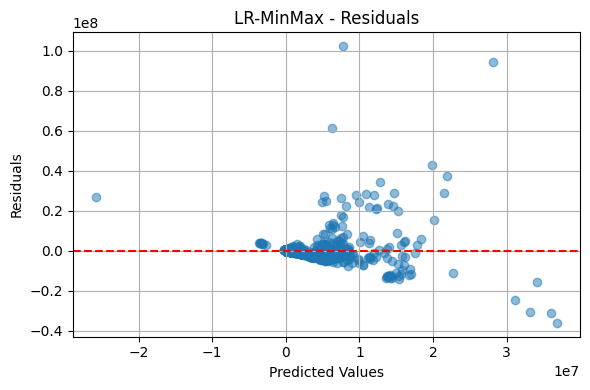

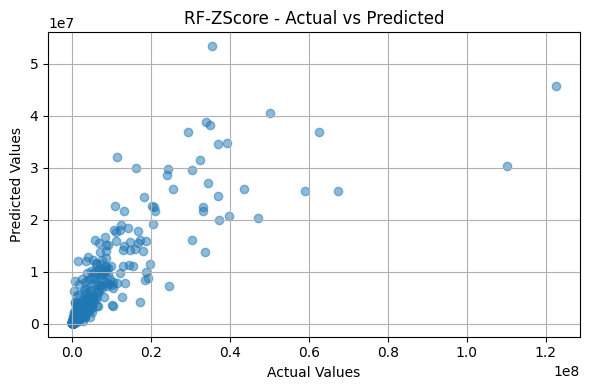

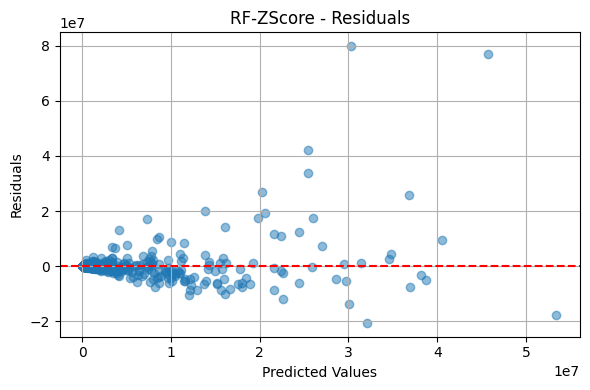

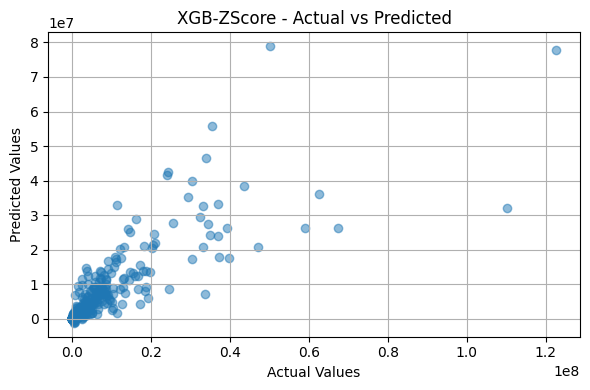

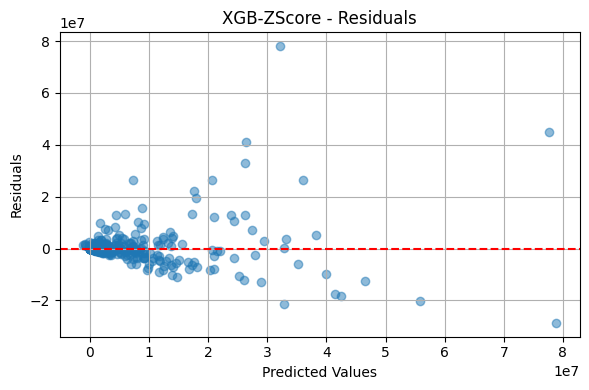

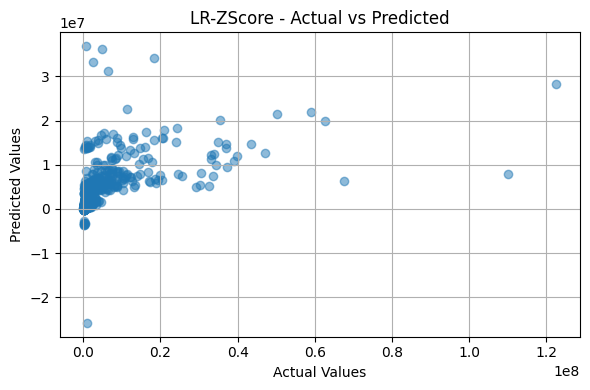

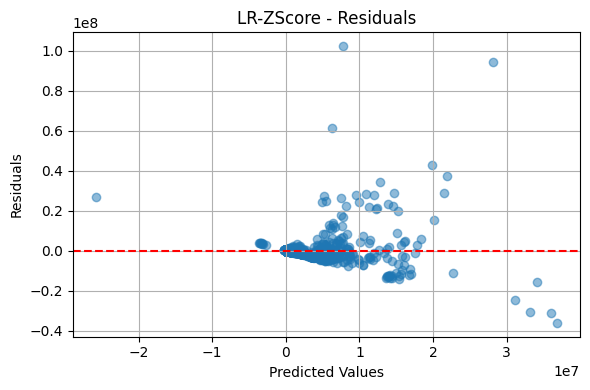

Model Performance Metrics:


,Model,R²,MAPE,nRMSE
0,RF-MinMax,0.711,0.126,0.004
1,XGB-MinMax,0.738,0.092,0.003
2,LR-MinMax,0.340,0.350,0.005
3,RF-ZScore,0.711,0.126,0.004
4,XGB-ZScore,0.738,0.092,0.003
5,LR-ZScore,0.340,0.350,0.005


Model Runtime Comparison:


,Model,Runtime (s)
0,RF-MinMax,57.7170
1,XGB-MinMax,11.0982
2,LR-MinMax,1.2476
3,RF-ZScore,57.2088
4,XGB-ZScore,10.9646
5,LR-ZScore,0.6303


Model MSE Comparison:


,Model,MSE
0,RF-MinMax,5.689424e+11
1,XGB-MinMax,5.158120e+11
2,LR-MinMax,1.297879e+12
3,RF-ZScore,5.689464e+11
4,XGB-ZScore,5.158143e+11
5,LR-ZScore,1.297879e+12


In [31]:
# Drop rows with missing target values
df_encoded = df_encoded.dropna(subset=["Total Assessed Value"])

# Select numerical features only
X = df_encoded.select_dtypes(include=[np.number]).drop(columns=["Total Assessed Value"])
y = df_encoded["Total Assessed Value"]

# Define scalers and models
scalers = {
    "MinMax": MinMaxScaler(),
    "ZScore": StandardScaler()
}
models = {
    "RF": RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42),
    "XGB": XGBRegressor(random_state=42),
    "LR": LinearRegression()
}

# Store performance and runtime metrics
performance = []
runtime_results = []
mse_results = []

# Evaluate each model with each scaling method
for scale_name, scaler in scalers.items():
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    for model_name, model in models.items():
        start_time = time.time()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        end_time = time.time()

        r2 = r2_score(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        nrmse = np.sqrt(mean_squared_error(y_test, y_pred)) / (y.max() - y.min())
        runtime = round(end_time - start_time, 4)
        mse = round(mean_squared_error(y_test, y_pred), 2)

        performance.append({
            "Model": f"{model_name}-{scale_name}",
            "R²": round(r2, 3),
            "MAPE": round(mape, 3),
            "nRMSE": round(nrmse, 3)
        })
        runtime_results.append({"Model": f"{model_name}-{scale_name}", "Runtime (s)": runtime})
        mse_results.append({"Model": f"{model_name}-{scale_name}", "MSE": mse})

        # Plot Actual vs Predicted
        plt.figure(figsize=(6, 4))
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.title(f"{model_name}-{scale_name} - Actual vs Predicted")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Plot Residuals
        residuals = y_test - y_pred
        plt.figure(figsize=(6, 4))
        plt.scatter(y_pred, residuals, alpha=0.5)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel("Predicted Values")
        plt.ylabel("Residuals")
        plt.title(f"{model_name}-{scale_name} - Residuals")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Display performance results
performance_df = pd.DataFrame(performance)
runtime_df = pd.DataFrame(runtime_results)
mse_df = pd.DataFrame(mse_results)

print("Model Performance Metrics:")
display(performance_df)

print("Model Runtime Comparison:")
display(runtime_df)

print("Model MSE Comparison:")
display(mse_df)

### Comment:

- The table and bar chart rank the top 10 most influential features in predicting Total Assessed Value.
- Importance scores are averaged across RF and XGB models to provide a balanced view.
- Property type and location-related features dominate the importance rankings.
- Water and land measurements are highly predictive, suggesting physical attributes are key drivers.

Top 10 Feature Importances (Average of RF and XGB):


,Feature,RF Importance,XGB Importance,Average Importance
35,Property Use Code_RESAM - APARTMENTS MULTIPLE USE,0.066518,0.450640,0.258579
2,Water Frontage Measurement,0.345942,0.107147,0.226545
1,Assessed Land Area,0.264693,0.051268,0.157981
36,Property Use Code_RESAP - APARTMENTS,0.049536,0.161175,0.105355
53,Zoning_freq,0.075030,0.067665,0.071347
3,Sewer Frontage Measurement,0.069450,0.007003,0.038226
52,Neighbourhood Area_freq,0.063238,0.008248,0.035743
51,Street Type_freq,0.023456,0.020209,0.021832
47,Property Use Code_RESSD - DETACHED SINGLE DWEL...,0.002065,0.028368,0.015216
32,Attached Garage_Yes,0.000416,0.023620,0.012018


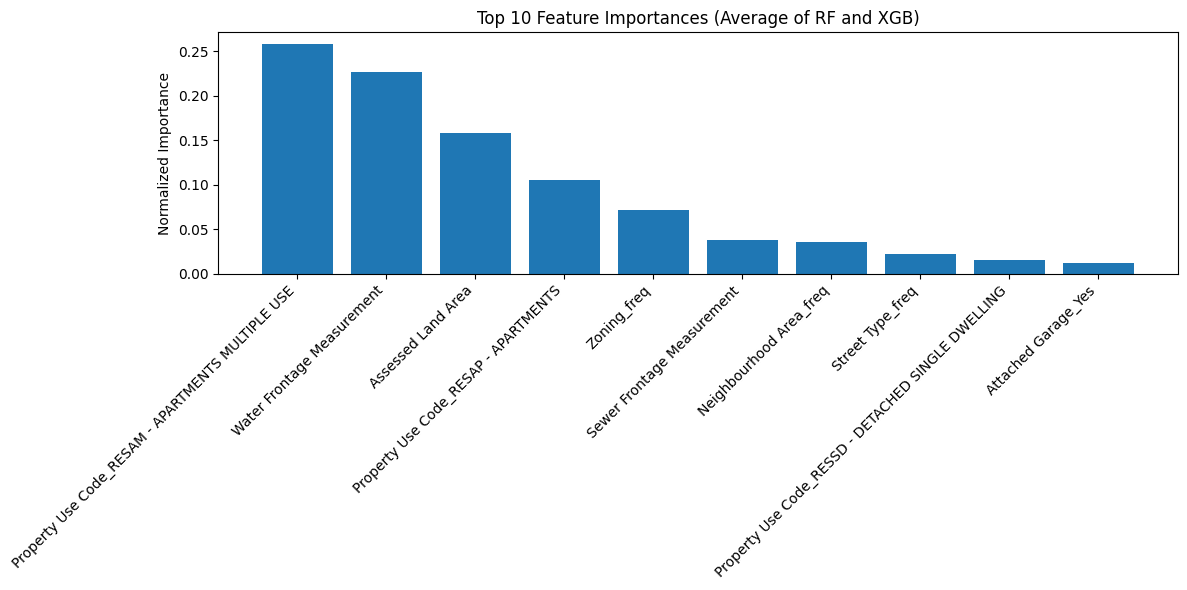

In [32]:
# Feature importance from RF and XGB on full scaled data
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
xgb_model = XGBRegressor(random_state=42)
rf_model.fit(X_scaled, y)
xgb_model.fit(X_scaled, y)

rf_importance = rf_model.feature_importances_
xgb_importance = xgb_model.feature_importances_
avg_importance = (rf_importance / rf_importance.sum() + xgb_importance / xgb_importance.sum()) / 2

importance_df = pd.DataFrame({
    "Feature": X.columns,
    "RF Importance": rf_importance / rf_importance.sum(),
    "XGB Importance": xgb_importance / xgb_importance.sum(),
    "Average Importance": avg_importance
}).sort_values(by="Average Importance", ascending=False)

# Display top 10 features
print("Top 10 Feature Importances (Average of RF and XGB):")
display(importance_df.head(10))

# Plot top 10 feature importances
plt.figure(figsize=(12, 6))
plt.bar(importance_df["Feature"][:10], importance_df["Average Importance"][:10])
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Feature Importances (Average of RF and XGB)")
plt.ylabel("Normalized Importance")
plt.tight_layout()
plt.show()